In [1]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
from PIL import Image

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
output_dir = 'drive/MyDrive/diploma_folder/chain_output'

In [4]:
res_dirs = []
for file in os.walk(output_dir):
    res_dirs.append(file[0])

res_dirs.pop(0)
print(res_dirs)

['drive/MyDrive/diploma_folder/chain_output/20220325-194605-resnet50-224_chain_start', 'drive/MyDrive/diploma_folder/chain_output/20220326-024949-resnet50-224_second', 'drive/MyDrive/diploma_folder/chain_output/20220326-162022-resnet50-224_third', 'drive/MyDrive/diploma_folder/chain_output/20220327-183155-resnet50-224_fourth', 'drive/MyDrive/diploma_folder/chain_output/20220327-232532-resnet50-224_fifth', 'drive/MyDrive/diploma_folder/chain_output/20220329-101257-resnet50-224_sixth', 'drive/MyDrive/diploma_folder/chain_output/20220330-165835-resnet50-224_seventh', 'drive/MyDrive/diploma_folder/chain_output/20220330-211934-resnet50-224_eighth', 'drive/MyDrive/diploma_folder/chain_output/20220331-110805-resnet50-224_last']


In [5]:
summary_df = pd.DataFrame()
for dir in res_dirs:
    next_df = pd.read_csv(os.path.join(dir, 'summary.csv'))
    summary_df = summary_df.append(next_df, ignore_index = True)
    
summary_df

,epoch,train_loss,eval_loss,eval_top1,eval_top5
0,0,0.277158,1.820661,42.5825,81.6250
1,1,0.240297,1.299241,60.3075,89.1500
2,2,0.221654,1.318273,63.1650,90.3600
3,3,0.207454,1.356610,61.7300,89.3500
4,4,0.208467,1.613304,53.8175,83.9650
...,...,...,...,...,...
304,304,0.127760,0.497375,86.1725,97.3925
305,305,0.124964,0.492757,86.2100,97.4150
306,306,0.128940,0.490216,86.4475,97.4150
307,307,0.122355,0.490926,86.4000,97.4025


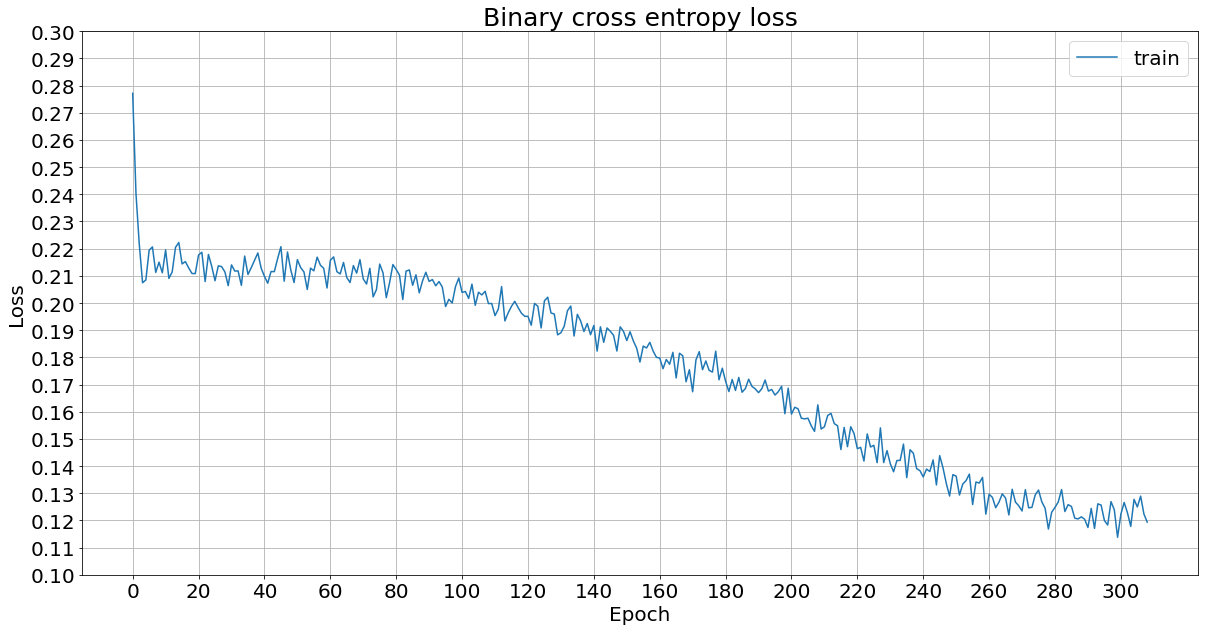

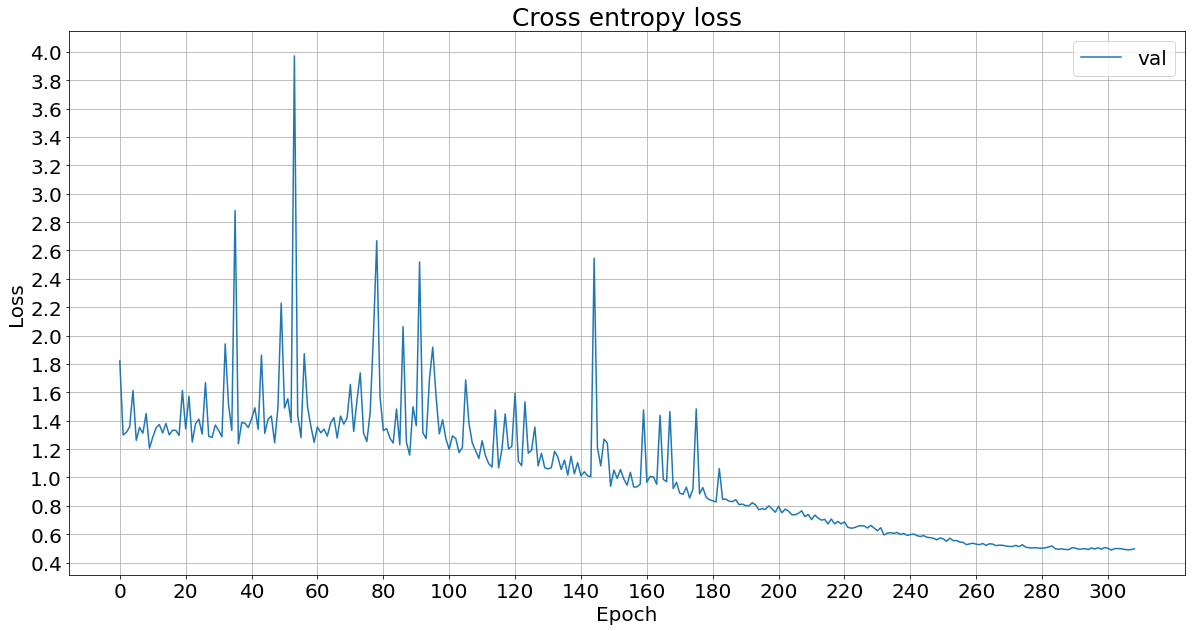

In [6]:
plt.figure(figsize = (20, 10))
plt.plot(summary_df.epoch, summary_df.train_loss, label = 'train')
plt.title('Binary cross entropy loss', fontsize = 25)
plt.xlabel('Epoch', fontsize = 20)
plt.xticks(np.linspace(0, 300, 16), fontsize = 20)
plt.ylabel('Loss', fontsize = 20)
plt.yticks(np.linspace(0.1, 0.3, 21), fontsize = 20)
plt.legend(fontsize = 20)
plt.grid()
plt.show()

plt.figure(figsize = (20, 10))
plt.plot(summary_df.epoch, summary_df.eval_loss, label = 'val')
plt.title('Cross entropy loss', fontsize = 25)
plt.xlabel('Epoch', fontsize = 20)
plt.xticks(np.linspace(0, 300, 16), fontsize = 20)
plt.ylabel('Loss', fontsize = 20)
plt.yticks(np.linspace(0.4, 4.0, 19), fontsize = 20)
plt.legend(fontsize = 20)
plt.grid()

plt.show()